# Kernel Methods Kaggle challenge

https://liverungrow.medium.com/sift-bag-of-features-svm-for-classification-b5f775d8e55f

# I) Imports

In [1]:
%cd ..

c:\Users\thoma\OneDrive\Documents\1_EN_COURS\kernel_methods


In [2]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

sns.set_theme()

# Personal code
from src.utils import get_accuracy, get_date_time_string, plot_one_image, row_to_image, get_submission, data_to_list_of_images
from src.kernels import RBF, Linear, Polynomial
from src.kernel_classifiers import SVM

DATA_FOLDER = "data/"

##  Testing binary classifier

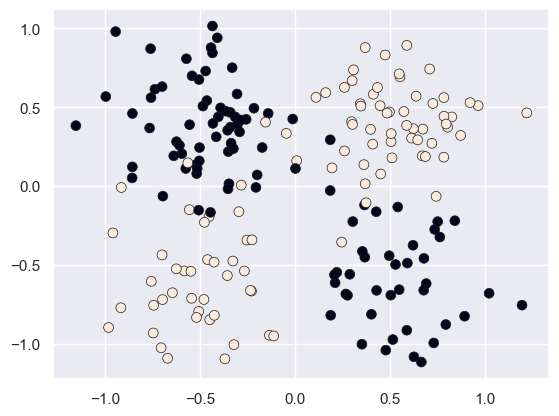

accuracy =  0.9


In [3]:
import pickle as pkl
# from sklearn.svm import SVC

file = open("data/classification_datasets", "rb")
datasets = pkl.load(file)
file.close()

train_dataset = datasets["dataset_3"]["train"]
test_dataset = datasets["dataset_3"]["test"]
plt.scatter(
    train_dataset["x"][:, 0],
    train_dataset["x"][:, 1],
    c=train_dataset["y"],
    s=50,
    edgecolors="k",
    linewidth=0.5,
)
plt.show()

# Custom classifier
gamma = 0.1
kernel = RBF(gamma).kernel
model = SVM(kernel=kernel, C=100)

# Sklearn classifier
# model = SVC(kernel="rbf", C=100, gamma = gamma)

# Evaluate
model.fit(train_dataset["x"], train_dataset["y"])
# model.bias = 2.61
y_pred = model.predict(test_dataset["x"])
acc = np.mean(test_dataset["y"] == y_pred)
print("accuracy = ", acc)

In [66]:
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [30]:
model.intercept_

array([2.612241])

In [31]:
model.dual_coef_

array([[-100.        , -100.        , -100.        , -100.        ,
        -100.        , -100.        , -100.        , -100.        ,
        -100.        , -100.        , -100.        , -100.        ,
        -100.        , -100.        ,  -27.22429525,  -80.82771364,
        -100.        , -100.        , -100.        , -100.        ,
        -100.        , -100.        ,  -14.43918977, -100.        ,
         -78.8337451 , -100.        , -100.        , -100.        ,
         100.        ,  100.        ,  100.        ,  100.        ,
         100.        ,  100.        ,  100.        ,  100.        ,
         100.        ,   91.50256918,  100.        ,  100.        ,
          51.53267525,  100.        ,  100.        ,  100.        ,
          58.28969933,  100.        ,  100.        ,  100.        ,
         100.        ,  100.        ,  100.        ,  100.        ,
         100.        ,  100.        ,  100.        ]])

In [43]:
len(train_dataset["x"])

200

In [41]:
model.support_vectors.shape

(55, 2)

In [7]:
model.alpha * model.y_train

array([-100.        , -100.        , -100.        , -100.        ,
        100.        , -100.        ,  100.        ,  100.        ,
        100.        , -100.        ,  100.        , -100.        ,
       -100.        , -100.        ,  100.        ,  100.        ,
        100.        , -100.        , -100.        ,  100.        ,
         89.50828856, -100.        ,  100.        , -100.        ,
        100.        ,   55.27328336,  100.        ,  100.        ,
       -100.        ,  100.        ,  -13.26441377,   56.82924285,
       -100.        ,  100.        ,  100.        , -100.        ,
        100.        , -100.        , -100.        ,  100.        ,
        100.        , -100.        , -100.        ,  100.        ,
       -100.        ,  -14.67946971,  100.        , -100.        ,
        100.        ,  -73.66693129, -100.        , -100.        ,
        100.        ,  100.        , -100.        ])

In [6]:
model.bias

2.613874626339547

In [24]:
model.y_train

array([ 1.,  1., -1.,  1., -1., -1.])

In [20]:
model.support_vectors

array([[-0.11366062, -0.95126099],
       [-0.23023531, -0.66675261],
       [-0.32562741,  0.23729195],
       [ 0.15970704,  0.59232602],
       [ 0.83914427, -0.22030034],
       [-0.85820572,  0.05136675]])

In [65]:
model.bias

-99.99999999999987

## Data

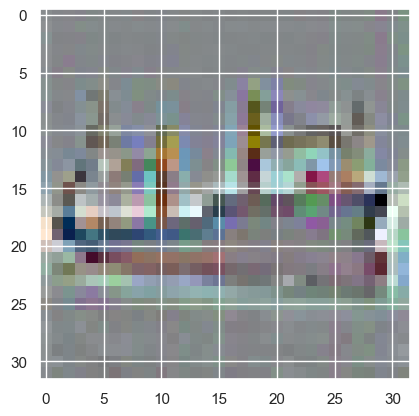

In [13]:
X_train_val = np.array(
    pd.read_csv(DATA_FOLDER + "Xtr.csv", header=None, sep=",", usecols=range(3072))
)
X_test = np.array(
    pd.read_csv(DATA_FOLDER + "Xte.csv", header=None, sep=",", usecols=range(3072))
)
y_train_val = np.array(
    pd.read_csv(DATA_FOLDER + "Ytr.csv", sep=",", usecols=[1])
).squeeze()

from src.train_test_split import stratified_train_test_split

X_train, X_val, y_train, y_val = stratified_train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_seed=42
)


image = row_to_image(X_train_val[0])
plt.imshow(image)
plt.show()

## EDA

In [44]:
Y_train = pd.read_csv(DATA_FOLDER + "Ytr.csv", sep=",", usecols=[1])
Y_train.value_counts()

Prediction
0             500
1             500
2             500
3             500
4             500
5             500
6             500
7             500
8             500
9             500
dtype: int64

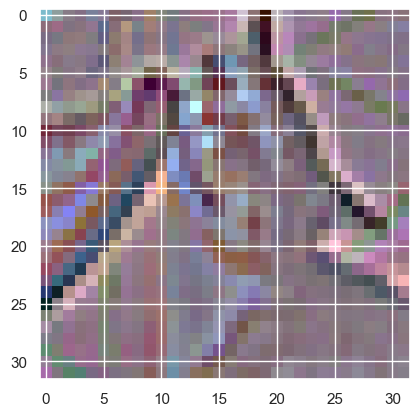

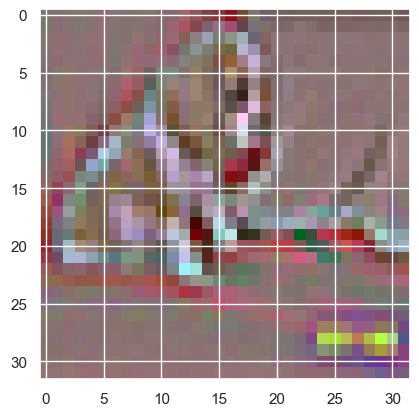

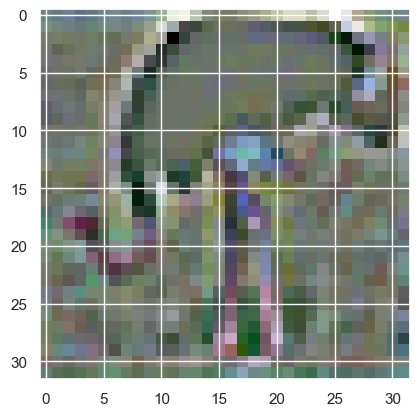

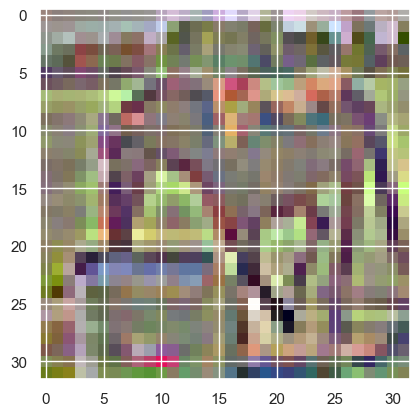

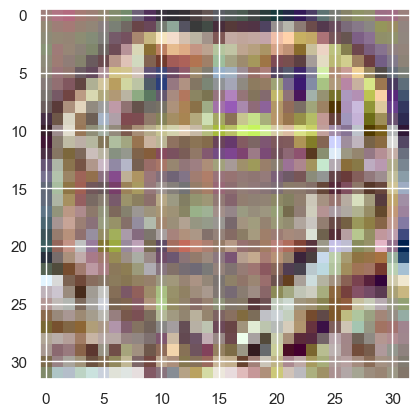

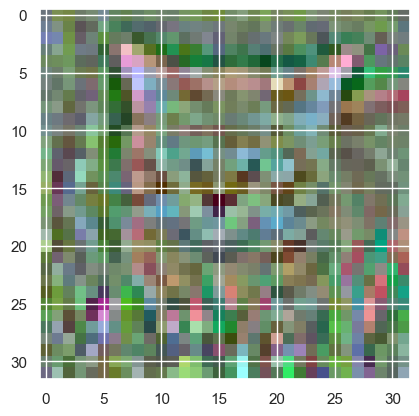

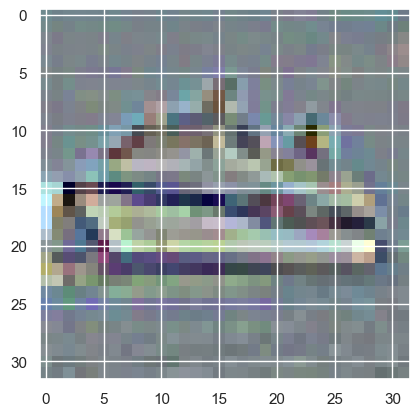

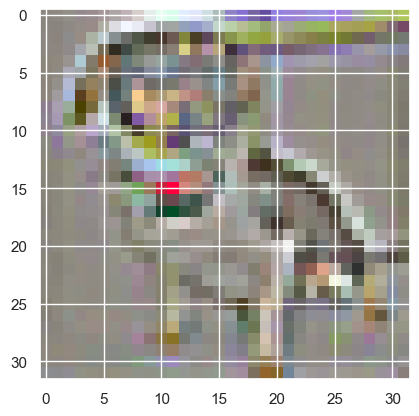

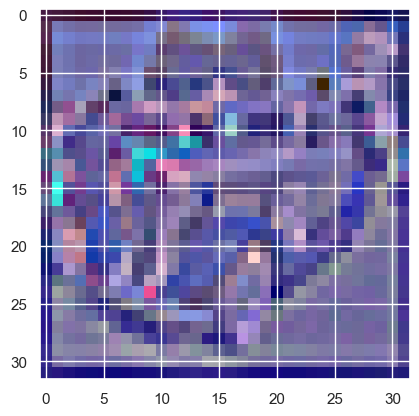

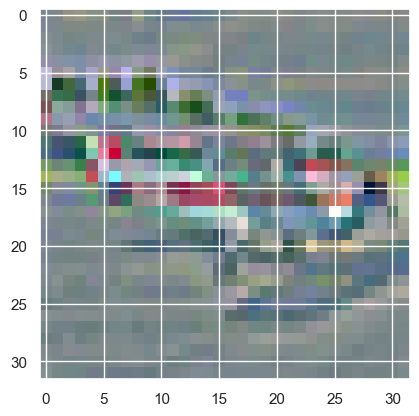

In [71]:
for i in range(10):
    idx = np.random.randint(0, 2000)
    image = plot_one_image(X_train[idx])

## Main

In [3]:
from src.train_test_split import stratified_train_test_split
from src.one_vs_one_classifier import OneVsOneClassifier
from src.preprocessing import preprocess_image_HOG
from src.data_augmentation import augment_data_opencv


# Load data
X_train_val = np.array(
    pd.read_csv(DATA_FOLDER + "Xtr.csv", header=None, sep=",", usecols=range(3072))
)
X_test = np.array(
    pd.read_csv(DATA_FOLDER + "Xte.csv", header=None, sep=",", usecols=range(3072))
)
y_train_val = np.array(
    pd.read_csv(DATA_FOLDER + "Ytr.csv", sep=",", usecols=[1])
).squeeze()

# Split data
X_train, X_val, y_train, y_val = stratified_train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_seed=42
)

# Transform data into images
X_train = data_to_list_of_images(X_train, normalize=False)
X_val = data_to_list_of_images(X_val, normalize=False)
X_test = data_to_list_of_images(X_test, normalize=False)

# Data augmentation
X_train, y_train = augment_data_opencv(X_train, y_train)

# Data preprocessing (centering + additing features)
X_train = preprocess_image_HOG(
    X_train, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), normalize = False
)
X_val = preprocess_image_HOG(
    X_val, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), normalize = False
)
X_test = preprocess_image_HOG(
    X_test, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), normalize = False
)

# Choose binary classifier
# from sklearn.svm import SVC
# binary_classifier = SVC(C=100.0, kernel='rbf', gamma = 100)
gamma = 100
kernel = RBF(gamma).kernel
binary_classifier = SVM(kernel=kernel, C=100)

# Transform it into a multiclass classifier
ovo_classifier = OneVsOneClassifier(binary_classifier)

# Fit the classifier
ovo_classifier.fit(X_train, y_train)

# Predict on validation
y_val_pred = ovo_classifier.predict(X_val, return_votes=False)
accuracy = get_accuracy(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Predict on test
y_test_pred = ovo_classifier.predict(X_test, return_votes = False)

# Save the predictions of the test
submission = get_submission(y_test_pred, name = 'submission_3_data_aug')

Making predictions: 100%|██████████| 45/45 [00:03<00:00, 13.45it/s]


Validation Accuracy: 0.5910


Making predictions: 100%|██████████| 45/45 [00:06<00:00,  6.81it/s]
